# ARIMA model

A class of statistical model for analyzing and forecasting time series data.
### ARIMA stands for AutoRegressive Integrated Moving Average

Data shows evidence of non-stationarity.

A random variable that is a time series(random process) is stationary if its statistical properties are all constant over the time.

- A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion.
- The latter condition menas that its autocorrelation remain constant over time.
- A random variable of this form can be viewed as a combination of signal and noise.
- An ARIMA model can be viewed as a "filter" that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

### What is ARIMA forecasting equation for a stationary time series?

A linear equation in which the predictors consist of lags of the dependent variable and lags of the forecast errors

### AR= AutoRegressive
- uses the dependent relationship between an observation and some number of lagged observations.
- p = lag order


### I= Integrated
- The use of differencing of raw obseravtions (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary
- d = Degree of differencing

### MA= Moving Averages
- uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.
- q = Order of moving average

### Assumptions of ARIMA model
- Stationarity
- Uncorrelated random error
- No outliers
- random shocks (a random error component) if any random error is present they are supposed to be randomly distributed with mean of 0 and constant variance

### ARIMA model is also known as Box-Jenkins Method
- a stochastic model building process

### Steps:
- 1. Visualize the Time series data
- 2. indentification
- 3. Estimation
- 4. diagnostic Checking

### Step 2: Identification
- Assess whether the time series is stationary, and if not, how many differences are required to make it stationary
- Identify the parameters of an ARMA model for the data

Unit Root tests- to determine whether or not it is stationary.

Avoid over differencing 

configuring AR and MA:

two diagnostic plots can be used to choose p and q parameter:
- ACF : AutoCorrelation Function- The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
- PACF : Partial Autocorrelation Function- the plot summarizes the correlation for an observation with lag values that is not accounted for by prior lagged observations.


The model is AR if the ACF trails off after a lag and has a hard cut-off in the PACF after a lag. This lag is taken as p

The model is MA if the PACF trails off after a lag and has a hard cut-off in the ACF after a lag. This lag is taken as q

The model is a mix of AR and MA if both the ACF and PACF trail off.

### Step 2: Estimation
Estimation involves using numerical methods to minimize a loss or error term.

### Step 3: Diagnostic Checking
Look for evidence that the model is not a good fit for the data

The two areas to investigate diagnostic are overfitting and residual errors
- Overfitting: The model is more complex than it needs to be and captures random noise in the training data. It negatively impacts the ability of the model to genralized, resulting in poor forecast performance on out of sample data. Careful attention must be paid to both in-sample and out-sample performance.
- Residuals errors: forecasting the residuals, visualize it with various plots, an ideal model would leave no temporal structure in the time series of forecast residuals.


# Using ARIMA to predict Bitcoin prices

In [42]:
# importing the required libraries

import numpy as np, matplotlib.pyplot as plt, pandas as pd
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [70]:
# reading the bitcoin file

df= pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-08,10677.625000,10939.799805,10569.823242,10923.627930,10923.627930,2.196212e+10
1,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-10,11059.142578,11442.210938,11056.940430,11296.361328,11296.361328,2.287798e+10
3,2020-10-11,11296.082031,11428.813477,11288.627930,11384.181641,11384.181641,1.996863e+10
4,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df=df.dropna()
df=df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-08,10677.625000,10939.799805,10569.823242,10923.627930,10923.627930,2.196212e+10
1,2020-10-10,11059.142578,11442.210938,11056.940430,11296.361328,11296.361328,2.287798e+10
2,2020-10-11,11296.082031,11428.813477,11288.627930,11384.181641,11384.181641,1.996863e+10
3,2020-10-14,11429.047852,11539.977539,11307.831055,11429.506836,11429.506836,2.410343e+10
4,2020-10-15,11426.602539,11569.914063,11303.603516,11495.349609,11495.349609,2.448723e+10


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(363, 7)

In [72]:
btc=df.set_index("Date")
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-08,10677.625000,10939.799805,10569.823242,10923.627930,10923.627930,2.196212e+10
2020-10-10,11059.142578,11442.210938,11056.940430,11296.361328,11296.361328,2.287798e+10
2020-10-11,11296.082031,11428.813477,11288.627930,11384.181641,11384.181641,1.996863e+10
2020-10-14,11429.047852,11539.977539,11307.831055,11429.506836,11429.506836,2.410343e+10
2020-10-15,11426.602539,11569.914063,11303.603516,11495.349609,11495.349609,2.448723e+10


In [7]:
x=btc.index
x_sampled=x[::10]
x_sampled

Index(['2020-10-08', '2020-10-21', '2020-10-31', '2020-11-10', '2020-11-20',
       '2020-11-30', '2020-12-10', '2020-12-20', '2020-12-30', '2021-01-09',
       '2021-01-19', '2021-01-29', '2021-02-08', '2021-02-18', '2021-02-28',
       '2021-03-10', '2021-03-20', '2021-03-30', '2021-04-09', '2021-04-19',
       '2021-04-29', '2021-05-09', '2021-05-19', '2021-05-29', '2021-06-08',
       '2021-06-18', '2021-06-28', '2021-07-08', '2021-07-18', '2021-07-28',
       '2021-08-07', '2021-08-17', '2021-08-27', '2021-09-06', '2021-09-16',
       '2021-09-26', '2021-10-06'],
      dtype='object', name='Date')

In [8]:
y=btc["Adj Close"]
y_sampled=y[::10]
y_sampled

Date
2020-10-08    10923.627930
2020-10-21    12823.689453
2020-10-31    13780.995117
2020-11-10    15290.902344
2020-11-20    18621.314453
2020-11-30    19625.835938
2020-12-10    18264.992188
2020-12-20    23477.294922
2020-12-30    28840.953125
2021-01-09    40254.546875
2021-01-19    36069.804688
2021-01-29    34316.386719
2021-02-08    46196.464844
2021-02-18    51679.796875
2021-02-28    45137.769531
2021-03-10    56008.550781
2021-03-20    58313.644531
2021-03-30    58917.691406
2021-04-09    58245.003906
2021-04-19    55724.265625
2021-04-29    53555.109375
2021-05-09    58232.316406
2021-05-19    37002.441406
2021-05-29    34616.066406
2021-06-08    33472.632813
2021-06-18    35787.246094
2021-06-28    34434.335938
2021-07-08    32877.371094
2021-07-18    31796.810547
2021-07-28    39995.906250
2021-08-07    44555.800781
2021-08-17    44695.359375
2021-08-27    49058.667969
2021-09-06    52633.535156
2021-09-16    47783.359375
2021-09-26    43208.539063
2021-10-06    55361.449

<function matplotlib.pyplot.show(close=None, block=None)>

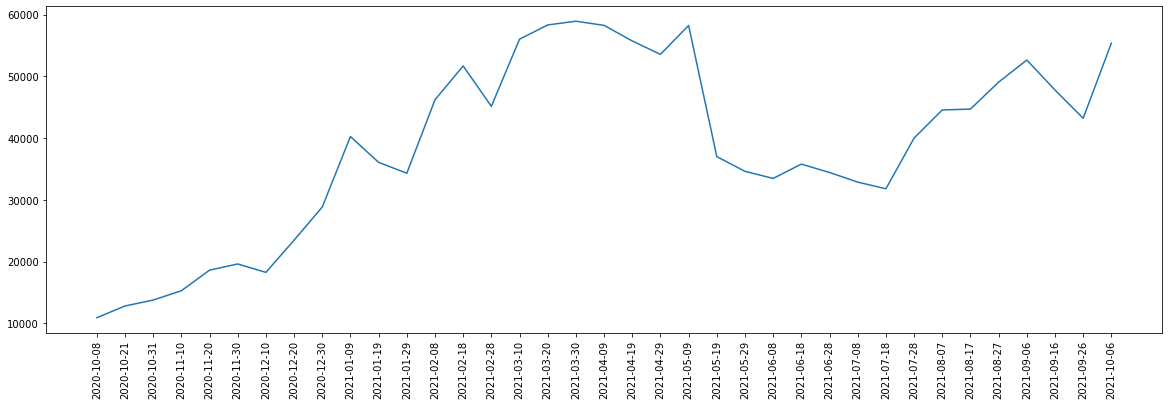

In [9]:
plt.figure(figsize=(20,6))
plt.plot(x_sampled,y_sampled)
plt.xticks(rotation=90)
plt.show

In [10]:
# train test split #1
# using 80% of the data as training set and 20% as testing data set

to_row=int(len(btc)*0.8)
print("Selecting the 90% of the rows: ",to_row)
training_data=list(btc[0:to_row]["Adj Close"])
testing_data=list(btc[to_row:]["Adj Close"])


Selecting the 90% of the rows:  290


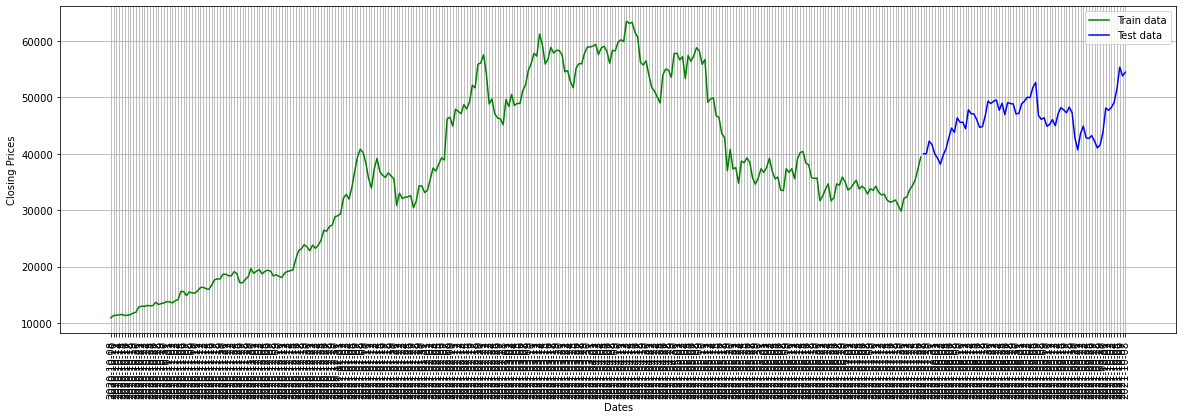

In [11]:
# the graphical format of train and test sets

plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing Prices")
plt.plot(btc[0:to_row]["Adj Close"],"green",label="Train data")
plt.plot(btc[to_row:]["Adj Close"], "blue", label="Test data")
plt.xticks(rotation=90)
plt.legend()

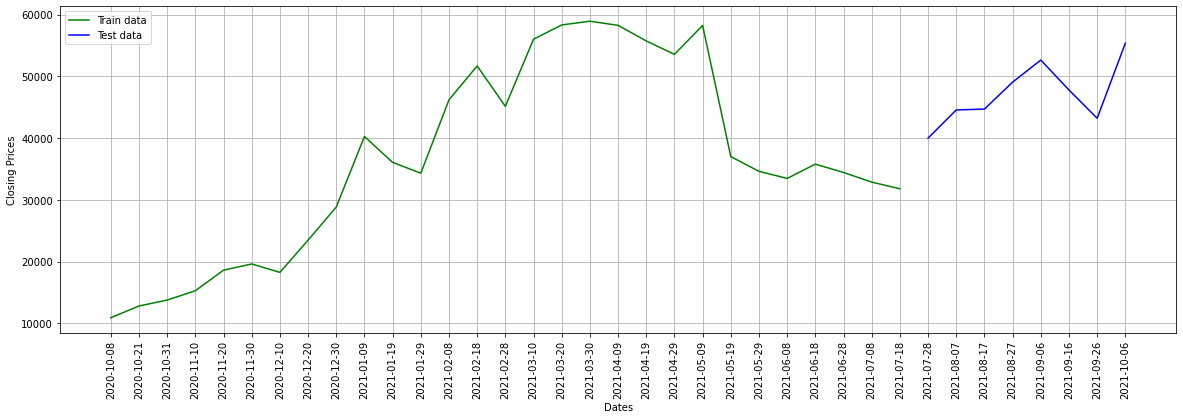

In [12]:
# getting better visualizing by sampling every 10th data point

train_d=btc[0:to_row]["Adj Close"]
test_d=btc[to_row:]["Adj Close"]

x_train=train_d[::10]
x_test=test_d[::10]

plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing Prices")
plt.plot(x_train,"green",label="Train data")
plt.plot(x_test, "blue", label="Test data")
plt.xticks(rotation=90)
plt.legend()

By visualizing we get to know that data is not stationary

In [13]:
# Testing for stationarity #2

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(btc["Adj Close"])
test_result

(-1.7365797400467886,
 0.4123708195139801,
 0,
 362,
 {'1%': -3.448544133483233,
  '5%': -2.8695574079525565,
  '10%': -2.5710411593052713},
 6142.030010061009)

In [40]:
# H0: It is not stationary
# H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels=["ADF Test statistic","p-value","Lags used","No.of observations used"]
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print(" strong evidence to reject null hypothesis i.e. accepting H1 : It is stationary.")
    else:
        print(" weak evidence to reject null hypothesis i.e. accepting H0 : It is not stationary.")

In [15]:
adfuller_test(btc["Adj Close"])

ADF Test statistic:-1.7365797400467886
p-value:0.4123708195139801
Lags used:0
No.of observations used:362
 weak evidence to reject null hypothesis i.e. accepting H0 : It is not stationary.


Now, we need to make the data stationary by differencing

In [19]:
# Differencing #3
# since, the data is non-seasonal we will the use shift(1), if we have got a seasonal data then shift(12)

btc["Adj Close"].shift(1)

Date
2020-10-08             NaN
2020-10-10    10923.627930
2020-10-11    11296.361328
2020-10-14    11384.181641
2020-10-15    11429.506836
                  ...     
2021-10-04    48199.953125
2021-10-05    49112.902344
2021-10-06    51514.812500
2021-10-07    55361.449219
2021-10-08    53805.984375
Name: Adj Close, Length: 363, dtype: float64

In [20]:
btc["Closing First difference"]=btc["Adj Close"]-btc["Adj Close"].shift(1)

In [21]:
btc

,Open,High,Low,Close,Adj Close,Volume,Closing First difference
Date,,,,,,,
2020-10-08,10677.625000,10939.799805,10569.823242,10923.627930,10923.627930,2.196212e+10,NaN
2020-10-10,11059.142578,11442.210938,11056.940430,11296.361328,11296.361328,2.287798e+10,372.733398
2020-10-11,11296.082031,11428.813477,11288.627930,11384.181641,11384.181641,1.996863e+10,87.820313
2020-10-14,11429.047852,11539.977539,11307.831055,11429.506836,11429.506836,2.410343e+10,45.325195
2020-10-15,11426.602539,11569.914063,11303.603516,11495.349609,11495.349609,2.448723e+10,65.842773
...,...,...,...,...,...,...,...
2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344,49112.902344,3.338317e+10,912.949219
2021-10-05,49174.960938,51839.984375,49072.839844,51514.812500,51514.812500,3.587390e+10,2401.910156
2021-10-06,51486.664063,55568.464844,50488.191406,55361.449219,55361.449219,4.903473e+10,3846.636719


In [ ]:
# dropping the nan value and checking the dickey fuller test again

In [25]:
adfuller_test(btc["Closing First difference"].dropna())

ADF Test statistic:-19.971138432501224
p-value:0.0
Lags used:0
No.of observations used:361
 strong evidence to reject null hypothesis i.e. accepting H1 : It is stationary.


<AxesSubplot:xlabel='Date'>

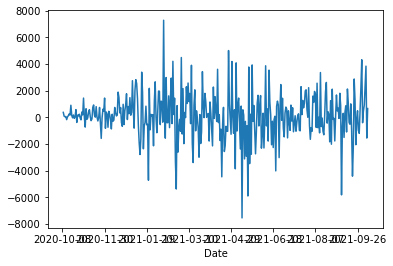

In [27]:
btc["Closing First difference"].plot()

We converted our data into stationary.

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


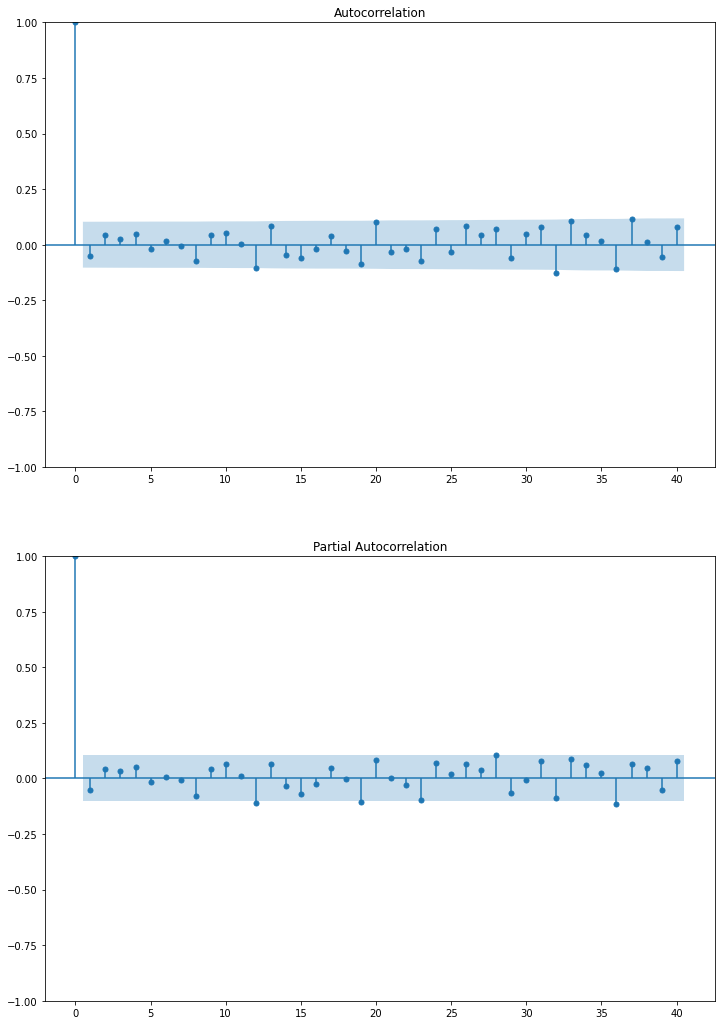

In [33]:
# ACF and PACF #4
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plt.figure(figsize=(12,18))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(btc["Closing First difference"].iloc[2:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(btc["Closing First difference"].iloc[2:],lags=40,ax=ax2)




From ACF we can conclude the value of q i.e. for MA it is 1.  
And from PACF the value of p i.e for AR it is 1. 
And the difference shift is taken as 1 i.e. d=1


In [63]:
# p=1, q=1, d=1

from statsmodels.tsa.arima.model import ARIMA

model_predictions=[]
n_test_obser=len(testing_data)
for i in range(n_test_obser):
    model=ARIMA(training_data,order=(1,1,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output)[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    #print(output)
    #break
    training_data.append(actual_test_value)

In [65]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  362
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3205.436
Date:                Sun, 23 Apr 2023   AIC                           6416.873
Time:                        11:20:55   BIC                           6428.539
Sample:                             0   HQIC                          6421.511
                                - 362                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5893      0.664     -0.887      0.375      -1.892       0.713
ma.L1          0.5463      0.697      0.784      0.433      -0.819       1.912
sigma2      3.055e+06   1.57e+05     19.420      0.0

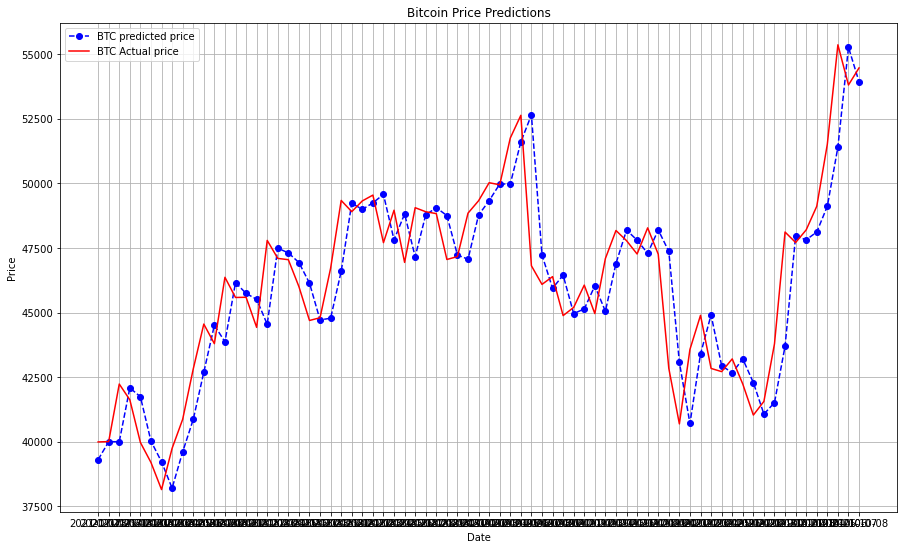

In [67]:
# Visualizing the model and predicting the values of the test obs.

plt.figure(figsize=(15,9))
plt.grid(True)
date_range=btc[to_row:].index

plt.plot(date_range,model_predictions,color="blue",marker="o",linestyle="dashed",label="BTC predicted price")
plt.plot(date_range,testing_data,color="red",label="BTC Actual price")

plt.title("Bitcoin Price Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [69]:
mape=np.mean(np.abs(np.array(model_predictions-np.array(testing_data))/np.abs(testing_data)))
print("Mean Absolute Percentage error: "+str(mape))
             

Mean Absolute Percentage error: 0.02872683573916973


This implies the model is about 97.1% accurate in predicting the test set observations.